In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KalmanFilter import KalmanFilter

In [80]:
def gen_nlin_toy_example(a_0, K):
    a = np.zeros((N, K, 1))
    y = np.zeros((N, K, 1))
    
    a_noise = np.random.normal(loc=0, scale=1, size=(N,K-1,1))
    y_noise = np.random.normal(loc=0, scale=1, size=(N,K,1))
    
    a[:, 0, :] = a_0
    
    for k in range(1, K):
        a[:, k, :] = np.sin(a[:, k-1, :]) + a_noise[:, k-1, :]
    
    y = np.tanh(a) + y_noise
    
    return a,y

def gen_lin_toy_example(a_0, K, F, Q, G, R):
    N, D = a_0.shape
    H, D = G.shape
    
    a = np.zeros((N, K, D))
    y = np.zeros((N, K, H))
    
    a_noise = np.random.multivariate_normal(mean=np.zeros((D,)),
                                            cov=Q,
                                            size=(N,K-1))
    
    y_noise = np.random.multivariate_normal(mean=np.zeros((H,)),
                                            cov=R,
                                            size=(N,K))
    
    a[:, 0, :] = a_0
    
    for k in range(1,K):
        a[:, k, :] = a[:, k-1, :]@(F.T) + a_noise[:, k-1, :]
        
    y = np.einsum('hd, nkd -> nkh', G, a) + y_noise
    
    return a, y       

In [81]:
N = 100
K = 50
D = 5
H = 7
a_0 = np.zeros((N, D))
F = np.ones((D,D))/1000
Q = np.identity(D)

G = np.ones((H,D))/1000
R = np.identity(H)

a, y = gen_lin_toy_example(a_0=a_0,
                    K=K,
                    F=F,
                    Q=Q,
                    G=G,
                    R=R)

In [82]:
kalman_filter_lin = KalmanFilter(params_path=params_path, verbose=True)
kalman_filter_lin.fit(A=a, Y=y, lmbda=1)

F : [[ 0.0011981  -0.00402781  0.00959868  0.01674453  0.00838557]
 [-0.00135663 -0.02068271 -0.00505388  0.00010826  0.0087078 ]
 [ 0.00757599 -0.01218428  0.00620988 -0.02210939  0.01602968]
 [ 0.00307884 -0.00194115 -0.0053441   0.01103069 -0.01366042]
 [ 0.00069284  0.00148566 -0.01244044  0.01684879 -0.00688294]]
F.shape : (5, 5)
Q : [[ 9.66292811e-01 -2.04375165e-02 -1.35702384e-02 -8.36646920e-04
  -3.42872720e-05]
 [-2.04375165e-02  1.02285109e+00 -8.79201797e-03 -6.67020245e-03
   2.09663251e-02]
 [-1.35702384e-02 -8.79201797e-03  1.02589602e+00 -6.19984979e-03
  -3.77603575e-03]
 [-8.36646920e-04 -6.67020245e-03 -6.19984979e-03  1.01043650e+00
  -1.51634003e-02]
 [-3.42872720e-05  2.09663251e-02 -3.77603575e-03 -1.51634003e-02
   9.97395358e-01]]
Q.shape : (5, 5)
G : [[-0.02070878  0.00158429  0.01605855  0.01147298 -0.03072323]
 [-0.00268111  0.01623978  0.01656802 -0.00449686  0.01255599]
 [-0.01046907  0.00225117  0.00671531  0.00801757 -0.01720669]
 [ 0.0072769   0.004834

In [79]:
a_rav = a.reshape((N*K, D))
y_rav = y.reshape((N*K, H))
print(a_rav)
print(y_rav)


kalman_filter_lin.G

[[ 0.          0.          0.          0.          0.        ]
 [ 0.81998296  0.56536079  0.04352867  2.30770688  1.46463194]
 [-2.19863778  0.35266429  0.68143264 -0.80257369 -2.46902951]
 ...
 [ 1.78602913  0.51771468  1.29146908  0.16765154 -0.317452  ]
 [ 0.18529664  0.11494106  0.6527063  -0.9102833  -1.77623775]
 [-0.67790669  0.11305507 -2.6272002   0.27234785  0.0314202 ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00520121  0.00520121  0.00520121 ...  0.00520121  0.00520121
   0.00520121]
 [-0.00443614 -0.00443614 -0.00443614 ... -0.00443614 -0.00443614
  -0.00443614]
 ...
 [ 0.00344541  0.00344541  0.00344541 ...  0.00344541  0.00344541
   0.00344541]
 [-0.00173358 -0.00173358 -0.00173358 ... -0.00173358 -0.00173358
  -0.00173358]
 [-0.00288828 -0.00288828 -0.00288828 ... -0.00288828 -0.00288828
  -0.00288828]]


array([[0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981],
       [0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981],
       [0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981],
       [0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981],
       [0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981],
       [0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981],
       [0.0009998 , 0.0009998 , 0.0009998 , 0.0009998 , 0.00099981]])

In [3]:
K = 50
N = 50
D = 1
a_0 = np.zeros((N,D))
a, y = gen_toy_example(a_0, K, N)

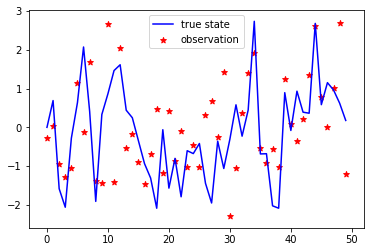

In [4]:
#visualisation of one trajectory
num_state = np.arange(K)
plt.figure()
plt.plot(num_state, a[0], color='blue', label='true state')
plt.scatter(num_state, y[0], marker='*', color='red', label='observation')
plt.legend()
plt.show()

In [5]:
params_path = 'coucou'
verbose = True
kalman_filter = KalmanFilter(params_path=params_path,
                             verbose=verbose)

In [6]:
kalman_filter.fit(A=a, Y=y, lmbda=0.2)

F : [[0.49101789]]
F.shape : (1, 1)
Q : [[1.11911834]]
Q.shape : (1, 1)
G : [[0.52243888]]
G.shape (1, 1)
R : [[1.08598856]]
R.shape : (1, 1)


In [17]:
a_pred, P_pred = kalman_filter.predict(Y=y, a_0=np.zeros((N,D)), P_0=np.tile(A=np.identity(D)[np.newaxis,: , :], reps=(N,1,1)))

In [15]:
print(a.shape)
print(a[0])
print(P.shape)

(50, 50, 1)
[[ 0.        ]
 [ 0.01530201]
 [-0.45804877]
 [-0.79691251]
 [-0.79832629]
 [ 0.2672208 ]
 [ 0.03514935]
 [ 0.83960322]
 [-0.36370653]
 [-0.83963139]
 [ 0.99812073]
 [-0.31959942]
 [ 0.88016351]
 [ 0.06484841]
 [-0.05528753]
 [-0.45288327]
 [-0.87560701]
 [-0.65780823]
 [-0.00805403]
 [-0.58227523]
 [-0.00993581]
 [-0.42763848]
 [-0.20148648]
 [-0.56782641]
 [-0.4282223 ]
 [-0.65914234]
 [-0.08873812]
 [ 0.29871328]
 [-0.01541776]
 [ 0.69238304]
 [-0.86033941]
 [-0.82550964]
 [-0.12348763]
 [ 0.63787455]
 [ 1.17267972]
 [ 0.16861866]
 [-0.3846805 ]
 [-0.41628032]
 [-0.6551099 ]
 [ 0.36419622]
 [ 0.17396656]
 [-0.11040761]
 [ 0.06506864]
 [ 0.68145229]
 [ 1.53108968]
 [ 0.9465704 ]
 [ 0.35095352]
 [ 0.6262546 ]
 [ 1.5442944 ]
 [-0.02051838]]
(50, 50, 1, 1)


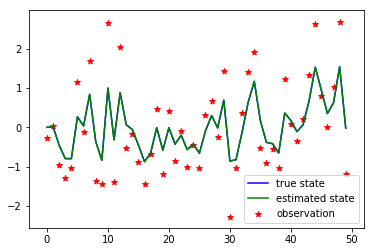

In [18]:
#visualisation of one trajectory
num_state = np.arange(K)
plt.figure()
plt.plot(num_state, a[0], color='blue', label='true state')
plt.plot(num_state, a_pred[0], color='green', label='estimated state')
plt.scatter(num_state, y[0], marker='*', color='red', label='observation')
plt.legend()
plt.show()

In [25]:
K_train = 50
N_train = 50

K_test = 20
N_test = 20

a_train, y_train = gen_toy_example(a_0=np.zeros((N_train, D)), K=K_train, N=N_train)
a_test, y_test = gen_toy_example(a_0=np.zeros((N_test, D)), K=K_test, N=N_test)

TypeError: fit() got an unexpected keyword argument 'y'

In [26]:
lmbda = 1e-2
kalman_filter.fit(A=a_train, Y=y_train, lmbda=lmbda)

F : [[0.49944437]]
F.shape : (1, 1)
Q : [[1.17945765]]
Q.shape : (1, 1)
G : [[0.51910643]]
G.shape (1, 1)
R : [[0.9933873]]
R.shape : (1, 1)


In [29]:
a_pred, P_pred = kalman_filter.predict(Y=y_test, a_0=np.zeros((N_test,D)), P_0=np.tile(A=np.identity(D)[np.newaxis,: , :], reps=(N_test,1,1)))

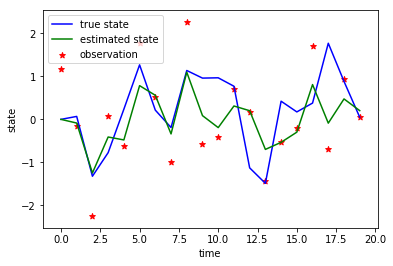

In [32]:
#visualisation of one trajectory
num_state = np.arange(K_test)
plt.figure()
plt.plot(num_state, a_test[0], color='blue', label='true state')
plt.plot(num_state, a_pred[0], color='green', label='estimated state')
plt.scatter(num_state, y_test[0], marker='*', color='red', label='observation')
plt.xlabel('time')
plt.ylabel('state')
plt.legend()
plt.show()

In [ ]:
P = np.ones((5,7))

F = 2*np.ones((2,7))

a = P[0,:]
print(P@F.T)

In [43]:
np.random.multivariate_normal(mean=np.zeros((5,)), cov = np.identity(5), size=7).shape

(7, 5)